SHAPE: (2, 2)
Hamiltonian: [[-4.  2.]
 [ 2. -4.]]
SHAPE: (2, 2)
Hamiltonian: [[-3.93185165  1.98288972]
 [ 1.98288972 -3.93185165]]
SHAPE: (2, 2)
Hamiltonian: [[-3.73205081  1.93185165]
 [ 1.93185165 -3.73205081]]
SHAPE: (2, 2)
Hamiltonian: [[-3.41421356  1.84775907]
 [ 1.84775907 -3.41421356]]
SHAPE: (2, 2)
Hamiltonian: [[-3.          1.73205081]
 [ 1.73205081 -3.        ]]
SHAPE: (2, 2)
Hamiltonian: [[-2.51763809  1.58670668]
 [ 1.58670668 -2.51763809]]
SHAPE: (2, 2)
Hamiltonian: [[-2.          1.41421356]
 [ 1.41421356 -2.        ]]
SHAPE: (2, 2)
Hamiltonian: [[-1.48236191  1.21752286]
 [ 1.21752286 -1.48236191]]
SHAPE: (2, 2)
Hamiltonian: [[-1.  1.]
 [ 1. -1.]]
SHAPE: (2, 2)
Hamiltonian: [[-0.58578644  0.76536686]
 [ 0.76536686 -0.58578644]]
SHAPE: (2, 2)
Hamiltonian: [[-0.26794919  0.51763809]
 [ 0.51763809 -0.26794919]]
SHAPE: (2, 2)
Hamiltonian: [[-0.06814835  0.26105238]
 [ 0.26105238 -0.06814835]]
SHAPE: (2, 2)
Hamiltonian: [[0.0000000e+00 1.2246468e-16]
 [1.2246468e-16 0.0000

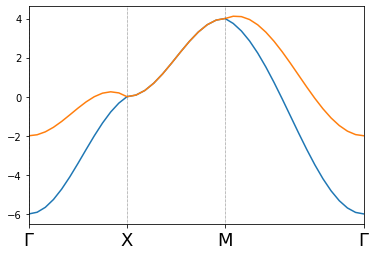

In [15]:
import numpy as np
import pylab as plt 

from pythtb import tb_model
from pythtb import wf_array

from orig_local_pythtb_NC import tb_model
from orig_local_pythtb_NC import wf_array

two_pi=2*np.pi

def get_model(t, tp):
    lat = [ [1.0, 0.0], [0.0, 1.0] ]
    orb = [ [0.0, 0.0], [0.5, 0.5] ]
    dimk=2; dimr=2
    mymodel=tb_model(dimk, dimr, lat, orb)

    mymodel.set_onsite([0., 0.])
    mymodel.set_hop( t , 0, 0, [1,0])
    mymodel.set_hop( t , 0, 0, [0,1])

    mymodel.set_hop( t , 1, 1, [1,0])
    mymodel.set_hop( t , 1, 1, [0,1])
    
    mymodel.set_hop( tp , 0, 1, [ 0,0])
    mymodel.set_hop( tp , 0, 1, [-1,0])

    return mymodel

def get_ham(k_list, t):
    k_list = 2*np.pi*np.array(k_list)
    ham = np.zeros(len(k_list), dtype=float)
    for ik, k in enumerate(k_list):
        ham[ik] = -2*t*(np.cos(k[0])+np.cos(k[1]))
    return ham

def Bands(model):
    path=[[0.,0.], [0.5, 0.],[0.5, 0.5],[0.,0.]]
    label=['$\Gamma$', 'X', 'M','$\Gamma$']
    (k_vec,k_dist,k_node)=model.k_path(path,41, report=False);
    evals, evecs=model.solve_all(k_vec, eig_vectors=True)
    
    #plt.figure(1, figsize=(12, 3))
    #plt.subplot(131)
    for j in range(evals.shape[0]):
        plt.plot(k_dist, evals[j])

    for n in range(len(k_node)): plt.axvline(x=k_node[n],linewidth=0.5,ls=':', color='k')
    plt.xticks(k_node, label, fontsize=18)
    plt.xlim(k_node[0], k_node[-1])
        
    #plt.subplot(132)
    #EneL = get_ham(k_vec, 1.)
    #plt.plot(k_dist, EneL)
    #for n in range(len(k_node)): plt.axvline(x=k_node[n],linewidth=0.5,ls=':', color='k')
    #plt.xticks(k_node, label, fontsize=18)
    #plt.xlim(k_node[0], k_node[-1])
    
    
t=-1.0; 
tp=1.
model = get_model(t, tp)


Bands(model)
    